## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# BUSINESS PROBLEM


In [ ]:
Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don't know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new studio can use to help decide what type of films to create.

# START BY REVIEWING AND GETTING TO INTERACT WITH THE DATA

##  Loading the data
here we import required python packages

In [3]:
# Your code here -remember to use markdown cells for comments as well!
#importing python library 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# BOM.MOVIE_GROSS
## Data Insights
start by having a look at what type of data is in the bom.movie_gross

In [3]:
#for easy memorability we will refer to the data from bom.movie_gross as movie_gross
movie_gross = pd.read_csv("bom.movie_gross.csv")
movie_gross
# The view of the data is as shown below

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [4]:
# a tuple representing the dimensionality  (in `(rows, columns)` ) of the DataFrame.
movie_gross.shape

(3387, 5)

In [5]:
#To get a concise summary of the dataframe i.e column names, the number of non-null values in each column, and its data type
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [6]:
movie_gross.describe()
#generate a summary of descriptive statistics for the numerical (domestic_gross)column in the dataset.

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [7]:
type(movie_gross)
#this determines the type of an object.

pandas.core.frame.DataFrame

In [8]:
len(movie_gross['studio'].unique())
#checking the total number of studios


258

#  Data cleaning 
In data cleaning we identify and correct or remove errors, inconsistencies, and inaccuracies from a dataset

Here we look for the missing data, outliers,duplicates,Standardizing data and correcting errors we come across our data 

### Identifying with missing values
Identify missing or null values in a DataFrame. using 'isna()'
True values are treated as 1 and False values are treated as 0.

In [9]:
movie_gross.isna().sum()
# to count the number of missing values in each column

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

### Handling the missing values in domestic_gross column
Observation: there are  missing values  in domestic_gross column (28)
Desicion : replace them  with  mean

In [10]:
mean_value = movie_gross['domestic_gross'].mean()
movie_gross['domestic_gross'].fillna(mean_value, inplace = True)
#replacing the missing values in domestic column with the mean of domestic_gross

In [11]:
## Rechecking the missing values in the  all columns(all missing values in the domestic_gross column are replaced)
movie_gross.isna().sum()

title                0
studio               5
domestic_gross       0
foreign_gross     1350
year                 0
dtype: int64

### Handling the missing values in studio column
Observation: there are  missing values  in studio column (5)
Desicion : replace them  with  most frequently occurring value in a set of data.

In [12]:
movie_gross['studio'].fillna(movie_gross['studio'].mode()[0], inplace = True)

In [13]:
## counterchecking if there is still missing values in studio
movie_gross.isna().sum()

title                0
studio               0
domestic_gross       0
foreign_gross     1350
year                 0
dtype: int64

In [14]:
movie_gross.duplicated().value_counts()
#it shows there is no duplicated data

False    3387
dtype: int64

In [15]:
# Access to the column labels of the DataFrame.
movie_gross.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

# ANALYSIS 
## Grouping the studio column by domestic_gross column

In [16]:
studio_data = movie_gross.groupby('studio')['domestic_gross'].sum().sort_values(ascending=False)
studio_data
# here we grouping the studio data by domestic_gross and we want the grouping in ascending order

studio
BV            1.841903e+10
Uni.          1.290239e+10
WB            1.216805e+10
Fox           1.094950e+10
Sony          8.488429e+09
                  ...     
TAFC          4.600000e+03
Hiber         3.600000e+03
ALP           2.800000e+03
Synergetic    2.400000e+03
DR            8.000000e+02
Name: domestic_gross, Length: 257, dtype: float64

In [17]:
top_10_studios = studio_data[:10]
top_10_studios
#these are the top 10 best selling studios withing the country( considering the domestic gross)

studio
BV         1.841903e+10
Uni.       1.290239e+10
WB         1.216805e+10
Fox        1.094950e+10
Sony       8.488429e+09
Par.       7.685871e+09
LGF        4.147709e+09
WB (NL)    3.995700e+09
LG/S       2.078200e+09
P/DW       1.682900e+09
Name: domestic_gross, dtype: float64

## A GRAPH  TO SHOW THE MOST PERFORMING STUDIOS CONSIDERING THE DOMESTIC GROSS

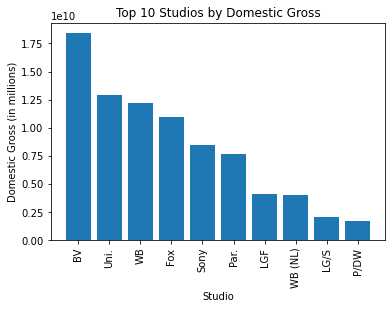

In [18]:
#HOW TO PLOT A BAR GRAPH
plt.bar(top_10_studios.index, top_10_studios.values)
plt.xticks(rotation=90)
plt.xlabel('Studio')
plt.ylabel('Domestic Gross (in millions)')
plt.title('Top 10 Studios by Domestic Gross')
plt.show()

In [19]:
movie_gross.isna().sum()
#foreihn has alot of missing values 
# they never made sales or the sata collection was incomplete consider dropping the missing marks
#studio replace with mode 
#replace the missing values with the mean

title                0
studio               0
domestic_gross       0
foreign_gross     1350
year                 0
dtype: int64

## HANDLING MISSING VALUES IN THE FOREIGN GROSS COLUMN
The missing value in the foerign domestic totals upto (1350)
Replacing (1350) data will result to a biased data and may results to inaccurate estimates hence inconsistent results


In [20]:
# dropping the foreign_gross column 
movie_gross.drop("foreign_gross", axis=1, inplace=True)

In [21]:
movie_gross
# Displayimg the dataset after dropping the foreign_gross column

,title,studio,domestic_gross,year
0,Toy Story 3,BV,415000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010
3,Inception,WB,292600000.0,2010
4,Shrek Forever After,P/DW,238700000.0,2010
...,...,...,...,...
3382,The Quake,Magn.,6200.0,2018
3383,Edward II (2018 re-release),FM,4800.0,2018
3384,El Pacto,Sony,2500.0,2018
3385,The Swan,Synergetic,2400.0,2018


In [22]:
movie_gross.info()
# the concise summary of the dataframe is that columns have reduced (from 5 to 4) and no missing values  in all columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3387 non-null   object 
 2   domestic_gross  3387 non-null   float64
 3   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 106.0+ KB


In [23]:
movie_gross.shape
#the number of row remains the same but the column has reduced by 1

(3387, 4)

# Data cleaning in tmdb.movies.csv

In [24]:
tmdb_movies_data = pd.read_csv("tmdb.movies.csv", index_col = 0)
tmdb_movies_data

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [25]:
tmdb_movies_data.shape

(26517, 9)

In [26]:
tmdb_movies_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


###missing values

In [27]:
tmdb_movies_data.isna().sum()

genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [28]:
tmdb_movies_data.duplicated().value_counts()

False    25497
True      1020
dtype: int64

In [29]:
tmdb_movies_data.shape
#initially the shape was 26517 when i dropped the duplicates  and ket the first the shape reduced to 25497

(26517, 9)

In [30]:
tmdb_movies_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [31]:
tmdb_movies_data.drop_duplicates(keep = 'first',inplace = True)

In [32]:
tmdb_movies_data.duplicated().value_counts()

False    25497
dtype: int64

In [33]:
tmdb_movies_data.describe()

,id,popularity,vote_average,vote_count
count,25497.000000,25497.000000,25497.000000,25497.000000
mean,294203.960505,3.043279,5.979331,178.795780
std,154690.249660,4.261045,1.866094,914.150311
min,27.000000,0.600000,0.000000,1.000000
25%,154770.000000,0.600000,5.000000,1.000000
50%,307125.000000,1.321000,6.000000,5.000000
75%,420707.000000,3.490000,7.000000,25.000000
max,608444.000000,80.773000,10.000000,22186.000000


In [34]:
#corelation btn release data
tmdb_movies_data["original_language"].head(60)
#according standard language code en represents english, nl dutch, therefor the most producing movies are using en .. microsoft shud consider english movies 

0     en
1     en
2     en
3     en
4     en
5     en
6     en
7     en
8     en
9     en
10    en
11    en
12    en
13    en
14    en
15    en
16    en
17    nl
18    en
19    en
20    en
21    en
22    en
23    en
24    en
25    en
26    en
27    en
28    en
29    en
30    en
31    en
32    en
33    en
34    en
35    en
36    en
37    en
38    en
39    en
40    en
41    en
42    en
43    en
44    en
45    en
46    en
47    en
48    en
49    es
50    en
51    en
52    en
53    en
54    en
55    en
56    en
57    en
58    en
59    en
Name: original_language, dtype: object

In [35]:
tmdb_movies_data["original_language"].head(60).unique()# acronym for en , nl , es

array(['en', 'nl', 'es'], dtype=object)

In [36]:
tmdb_movies_data["original_language"].value_counts()
#we have 76 lANGUAGES and their frequency
#en turns to be the most used language for high selling of movies

en    22384
fr      483
es      439
ru      295
ja      244
      ...  
kk        1
mi        1
ha        1
cy        1
bo        1
Name: original_language, Length: 76, dtype: int64

In [37]:
tmdb_movies_data.groupby(['original_language','original_title','popularity']).sum()

id  vote_average  \
original_language original_title      popularity                         
ab                Bacon & God's Wrath 0.600       355481           7.0   
                  Ghayal Once Again   1.293       381298           6.0   
                  Manson's Lost Girls 1.796       381737           4.8   
                  The Documentary     0.600       262896           9.0   
af                Nommer 37           4.814       502193           5.8   
...                                                  ...           ...   
zh                霰雪                  0.876       310541           8.5   
                  非常幸运                1.400       220488           4.3   
                  風箏                  0.600       585324          10.0   
                  黄飞鸿之英雄有梦            8.813       294993           6.4   
                  龙虾刑警                4.083       527415           0.0   

                                                  vote_count  
original_language original_title      popularity              
ab                Bacon & God's Wrath 0.600                1  
                  Ghayal Once Again   1.293               11  
                  Manson's Lost Girls 1.796                6  
                  The Documentary     0.600                1  
af                Nommer 37           4.814                5  
...                                                      ...  
zh                霰雪                  0.876                1  
                  非常幸运                1.400                9  
                  風箏                  0.600                1  
                  黄飞鸿之英雄有梦            8.813               50  
                  龙虾刑警                4.083                1  

[25439 rows x 3 columns]

In [38]:
mode =tmdb_movies_data['original_language'].mode()[0]
mode

'en'

# Data cleaning in rt.movie_info

In [39]:
movie_info = pd.read_csv("rt.movie_info.tsv",delimiter ="\t" )
movie_info

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [40]:
movie_info.isna().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [41]:
movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [42]:
mode_rating = movie_info["rating"].mode()[0]
movie_info("rating").fillna(mode_rating, inplace = True)

TypeError: 'DataFrame' object is not callable

In [ ]:
mode_rating = movie_info['rating'].mode()[0]
movie_info['rating'].fillna(mode_rating, inplace = True)

In [ ]:
mode_genre = movie_info['genre'].mode()[0]
movie_info['genre'].fillna(mode_genre, inplace = True)

In [ ]:
mode_runtime = movie_info['runtime'].mode()[0]
movie_info['runtime'].fillna(mode_runtime, inplace = True)

In [ ]:
movie_info['runtime'] = movie_info['runtime'].str.extract(r'(\d+\.?\d*)', expand = False).astype(int)

In [ ]:
movie_info_df = movie_info[['rating', 'genre', 'runtime']]
movie_info_df

# Data cleaning in tn.movies_budget_csv

In [4]:
#loading the data and view the data
movie_budgets = pd.read_csv("tn.movie_budgets.csv")
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [5]:
#checking the  number of  rows and columns
movie_budgets.shape

(5782, 6)

In [6]:
#checking the
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


# Data Cleaning

In [7]:
movie_budgets.isna().sum()
#it show there is no missing values or data

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [8]:
#checking any duplicated values
movie_budgets.duplicated().value_counts()

False    5782
dtype: int64

In [9]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [50]:
#we convert production_budget, domestic_gross and worldwide_gross columns from objects to floats
#we then remove the dollar signs ($) and commas from the values
movie_budgets['production_budget'] = movie_budgets['production_budget'].str.replace('$', '').str.replace(',', '').astype(float)
movie_budgets['domestic_gross'] = movie_budgets['domestic_gross'].str.replace('$', '').str.replace(',', '').astype(float)
movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].str.replace('$', '').str.replace(',', '').astype(float)

In [11]:
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [12]:
#we then verify that the values in the production_budget, domestic_gross and worldwide_gross columns are now float data types
movie_budgets.dtypes

id                    int64
release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

The three highlighted columns likely represent the production budget and revenue figures for each movie, which can be used for financial analysis

In [14]:
movie_budgets['release_date'] = pd.to_datetime(movie_budgets['release_date'])
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   object        
 4   domestic_gross     5782 non-null   object        
 5   worldwide_gross    5782 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 271.2+ KB


In [15]:

movie_budgets['year'] = movie_budgets['release_date'].dt.year
movie_budgets['month'] = movie_budgets['release_date'].dt.month
movie_budgets['day'] = movie_budgets['release_date'].dt.day

#we print the updated dataframe
print(movie_budgets)

      id release_date                                        movie  \
0      1   2009-12-18                                       Avatar   
1      2   2011-05-20  Pirates of the Caribbean: On Stranger Tides   
2      3   2019-06-07                                 Dark Phoenix   
3      4   2015-05-01                      Avengers: Age of Ultron   
4      5   2017-12-15            Star Wars Ep. VIII: The Last Jedi   
...   ..          ...                                          ...   
5777  78   2018-12-31                                       Red 11   
5778  79   1999-04-02                                    Following   
5779  80   2005-07-13                Return to the Land of Wonders   
5780  81   2015-09-29                         A Plague So Pleasant   
5781  82   2005-08-05                            My Date With Drew   

     production_budget domestic_gross worldwide_gross  year  month  day  
0         $425,000,000   $760,507,625  $2,776,345,279  2009     12   18  
1         $

In [49]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [16]:
movie_budgets.describe()

,id,year,month,day
count,5782.000000,5782.000000,5782.000000,5782.000000
mean,50.372363,2003.967139,7.050675,16.401245
std,28.821076,12.724386,3.480147,8.803660
min,1.000000,1915.000000,1.000000,1.000000
25%,25.000000,2000.000000,4.000000,9.000000
50%,50.000000,2007.000000,7.000000,17.000000
75%,75.000000,2012.000000,10.000000,24.000000
max,100.000000,2020.000000,12.000000,31.000000


# Data Analysis and Visualization

In [ ]:
#extract the top movies with the huighest worldwide gross
#using horizontal bar graph to display the top 10 movies with the highest worldwide gross, movies on the Y-axis and gross on the x-axis

In [85]:
## correlation
movie_budgets['production_budget'].corr(movie_budgets['worldwide_gross'])

0.8669640732897896

In [1]:
movie_budgets['production_budget'].corr(movie_budgets['domestic_gross'])

NameError: name 'movie_budgets' is not defined

In [58]:
correlation_pr_dm = round(movie_budgets['production_budget'].corr(movie_budgets['domestic_gross']),4)*100
print("The correlation between prod budg and dom gross rev is :", correlation_pr_dm, "%")

The correlation between prod budg and dom gross rev is : 68.57 %


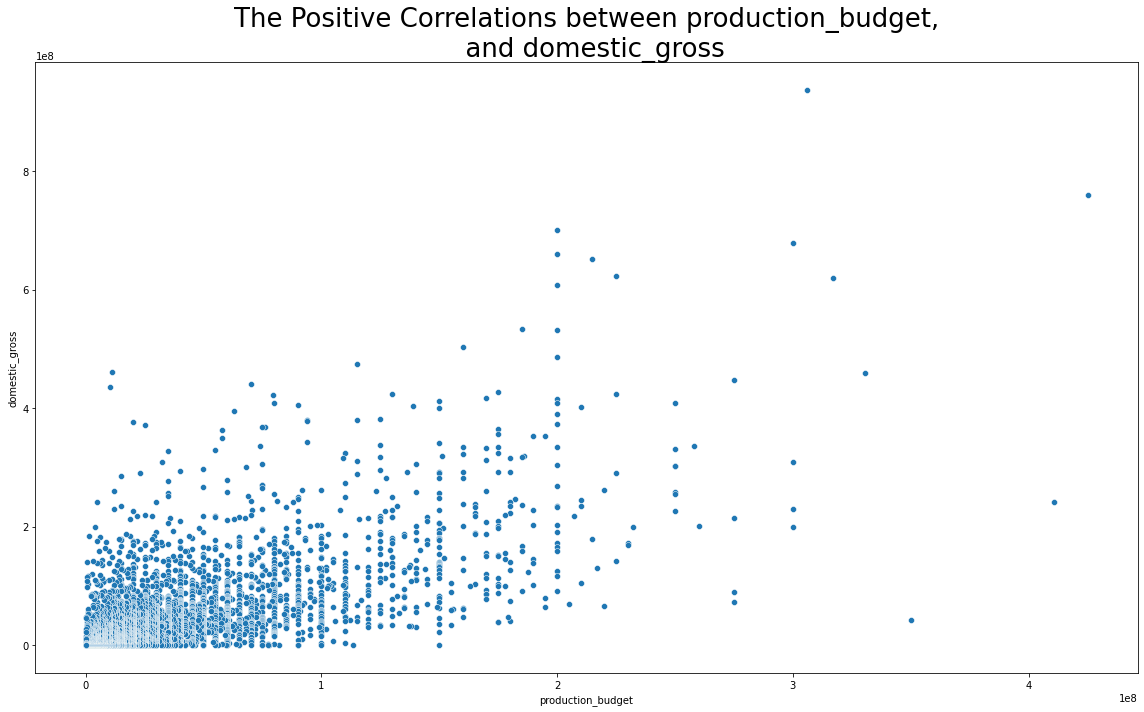

In [66]:
plt.figure(figsize=(16, 10)) 
sns.scatterplot(x='production_budget', y='domestic_gross', data = movie_budgets)
plt.title("The Positive Correlations between production_budget,\n  and domestic_gross", fontsize=26)
plt.tight_layout()
plt.show()

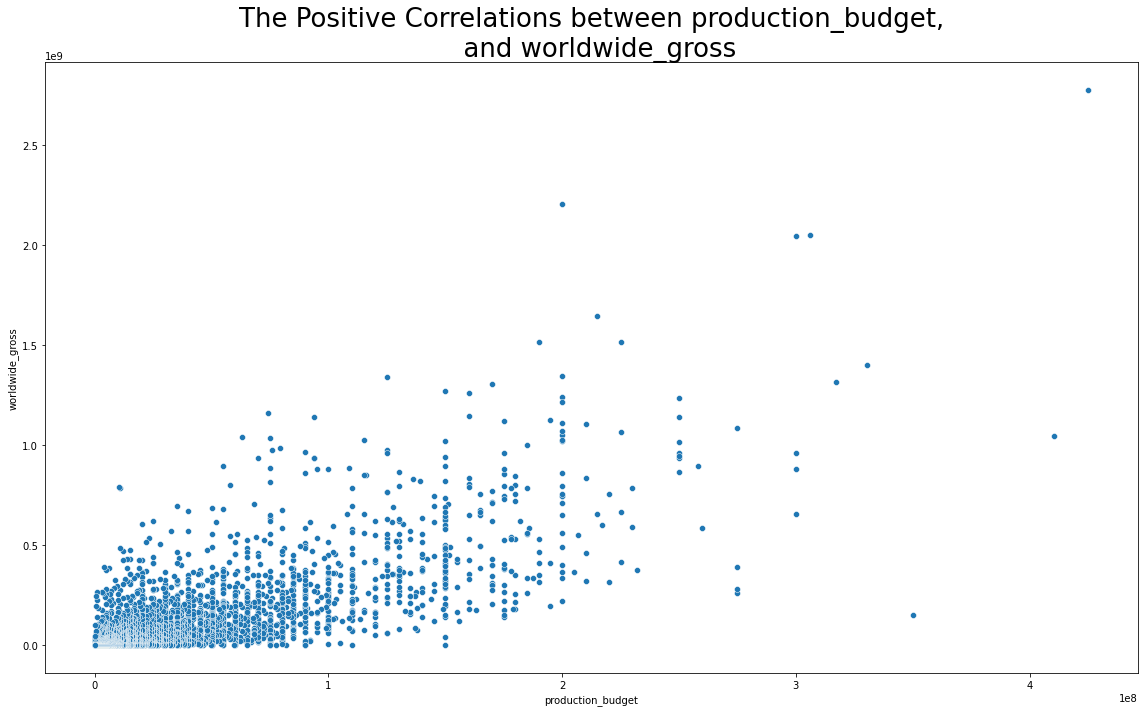

In [57]:
plt.figure(figsize=(16, 10)) 
sns.scatterplot(x='production_budget', y='worldwide_gross', data = movie_budgets)
plt.title("The Positive Correlations between production_budget,\n  and worldwide_gross", fontsize=26)
plt.tight_layout()
plt.show()

In [ ]:
There is a positive correlation between the production budget and worldwide gross: 
    The scatterplot shows a general trend where movies with higher production budgets tend to have higher worldwide gross. Therefore, Microsoft company may want to consider increasing their production budget to increase their chances of higher worldwide gross
    #

In [75]:
movie_budgets['return_on_inv'] = ((movie_budgets['domestic_gross'] + movie_budgets['worldwide_gross'] - movie_budgets['production_budget']) / movie_budgets['production_budget']).round(2)
movie_budgets.head(50)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,month,day,return_on_inv
5406,7,1999-07-14,The Blair Witch Project,600000.0,140539099.0,248300000.0,1999,7,14,647.07
5679,80,2015-07-10,The Gallows,100000.0,22764410.0,41656474.0,2015,7,10,643.21
5773,74,1993-02-26,El Mariachi,7000.0,2040920.0,2041928.0,1993,2,26,582.26
5613,14,1980-03-21,Mad Max,200000.0,8750000.0,99750000.0,1980,3,21,541.50
5709,10,2004-05-07,Super Size Me,65000.0,11529368.0,22233808.0,2004,5,7,518.43
5346,47,1942-08-13,Bambi,858000.0,102797000.0,268000000.0,1942,8,13,431.16
5715,16,1995-08-09,The Brothers McMullen,50000.0,10426506.0,10426506.0,1995,8,9,416.06
5665,66,1974-10-18,The Texas Chainsaw Massacre,140000.0,26572439.0,26572439.0,1974,10,18,378.61
5676,77,1968-10-01,Night of the Living Dead,114000.0,12087064.0,30087064.0,1968,10,1,368.95
5536,37,1978-10-17,Halloween,325000.0,47000000.0,70000000.0,1978,10,17,359.00


In [ ]:
Although there is a positive correlation between production budget and worldwide gross, it is important to evaluate the return on investment (ROI) of a movie. microsoft may want to analyze the profitability of their movies by comparing the production budget to the worldwide gross and factoring in other expenses such as marketing and distribution costs.

In [77]:
movie_budgets_sample= movie_budgets.sort_values(by = 'return_on_inv', ascending= False).head(20).iloc[1:20]
movie_budgets_sample.head(50)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,month,day,return_on_inv
5773,74,1993-02-26,El Mariachi,7000.0,2040920.0,2041928.0,1993,2,26,582.26
5613,14,1980-03-21,Mad Max,200000.0,8750000.0,99750000.0,1980,3,21,541.50
5709,10,2004-05-07,Super Size Me,65000.0,11529368.0,22233808.0,2004,5,7,518.43
5346,47,1942-08-13,Bambi,858000.0,102797000.0,268000000.0,1942,8,13,431.16
5715,16,1995-08-09,The Brothers McMullen,50000.0,10426506.0,10426506.0,1995,8,9,416.06
5665,66,1974-10-18,The Texas Chainsaw Massacre,140000.0,26572439.0,26572439.0,1974,10,18,378.61
5676,77,1968-10-01,Night of the Living Dead,114000.0,12087064.0,30087064.0,1968,10,1,368.95
5536,37,1978-10-17,Halloween,325000.0,47000000.0,70000000.0,1978,10,17,359.00
5210,11,1976-11-21,Rocky,1000000.0,117235147.0,225000000.0,1976,11,21,341.24
5781,82,2005-08-05,My Date With Drew,1100.0,181041.0,181041.0,2005,8,5,328.17


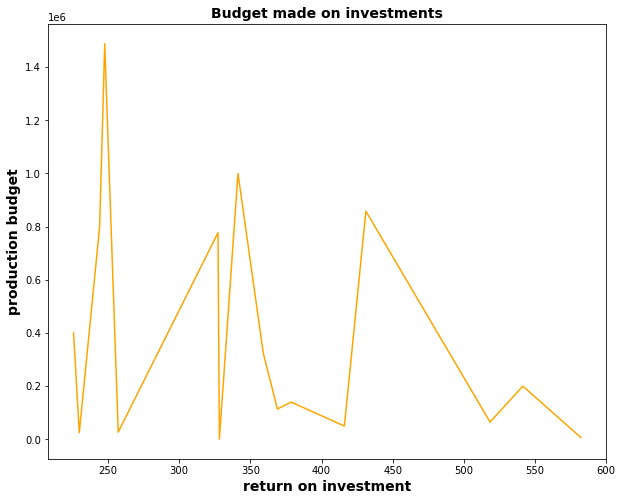

In [78]:
x = movie_budgets_sample["return_on_inv"]
y = movie_budgets_sample['production_budget'] 
plt.xlabel("return on investment", fontsize=14, fontweight='bold')
plt.ylabel("production budget", fontsize =14, fontweight= 'bold')
plt.title("Budget made on investments", fontsize=14, fontweight = 'bold')
plt.gcf().set_size_inches(10,8)
plt.plot(x,y, color = 'orange');

In [79]:
the budget doesn't determine the return on investment of the movie

SyntaxError: invalid syntax (<ipython-input-79-1149b5c54ed7>, line 1)

<AxesSubplot:xlabel='worldwide_gross', ylabel='movie'>

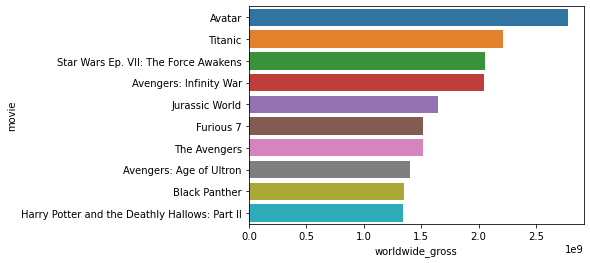

In [69]:
top_10 = movie_budgets.nlargest(10, 'worldwide_gross')
top_10_domestic = movie_budgets.nlargest(10, 'domestic_gross')
top_10_production = movie_budgets.nlargest(10, 'production_budget')

sns.barplot(x='worldwide_gross', y='movie', data=top_10, orient='h')

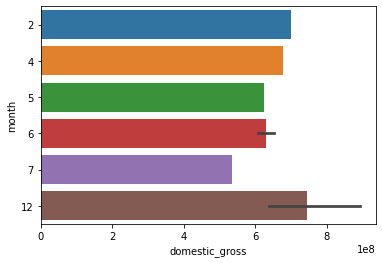

In [70]:
sns.barplot(x='domestic_gross', y='month', data=top_10_domestic, orient='h');

In [ ]:
from te above 

### correlation

In [80]:
correlation_pr_dm = round(movie_budgets['production_budget'].corr(movie_budgets['domestic_gross']),4)*100
print("The correlation between production budget and domestic revenue is :", correlation_pr_dm,"%")

The correlation between production budget and domestic revenue is : 99.03 %


In [81]:
correlation_pr_ww = round(movie_budgets['production_budget'].corr(movie_budgets['worldwide_gross']), 4)*100
print("The correlation between production budget and worldwide revenue is :", correlation_pr_ww, "%")

The correlation between production budget and worldwide revenue is : 86.7 %


In [83]:
movie_budgets['production_budget'].corr(movie_budgets['domestic_gross'])

0.9903032564512921

In [84]:
movie_budgets['production_budget'].corr(movie_budgets['return_on_inv'])

-0.37257961855911675

# im.db
##reading im database
here we going to be dealinh with im database

In [ ]:
import sqlite3
import pandas as pd
conn = sqlite3.connect("im.db")

In [ ]:
movie_basic_data = pd.read_sql("""SELECT *
FROM movie_basics"""
            ,conn)
movie_basic_data

In [ ]:
movie_basic_data.info()

In [ ]:
movie_basic_data.isna().sum()

In [ ]:
movie_ratings_data = pd.read_sql("""SELECT *
FROM movie_ratings;""",conn)
movie_ratings_data

In [ ]:
movie_ratings_data.info()

In [ ]:
movie_ratings_data.isna().sum()

# Connect movie basic with movie ratings

In [ ]:
movie_database = pd.read_sql("""
SELECT *
FROM movie_basics
JOIN movie_ratings
USING(movie_id);""",conn)

In [ ]:
movie_database

In [ ]:
movie_database.info()

# Data cleaning in im.db


In [ ]:
movie_database.isna().sum()

In [ ]:
movie_database.duplicated().value_counts()

In [ ]:
movie_database['genres'].mode()[0]

In [ ]:
movie_database['genres'].value_counts()

In [ ]:
we replace the missing values in the genre with the most-occuring genre(drama)

In [ ]:
mode_movie_database = movie_database['genres'].mode()[0]
movie_database['genres'].fillna('mode_movie_database',inplace = True)


In [ ]:
movie_database.info()

In [ ]:
movie_database.isna().sum()

In [ ]:
mean_movie_database = movie_database['runtime_minutes'].mean()
movie_database['runtime_minutes'].fillna('mean_movie_database',inplace = True)

In [ ]:
 movie_database.info()

In [ ]:
 movie_database.isna().sum()

In [ ]:
plt.hist(movie_database['averagerating'], bins = 10);


# Data cleaning in  rt.reviews.tsv

In [ ]:
movie_reviews = pd.read_csv("rt.reviews.tsv",delimiter='\t', encoding = 'latin-1')
movie_reviews

In [ ]:
movie_reviews.info()

In [ ]:
movie_reviews.isna().sum()


# NEXT STEPS

In [ ]:
DO FURTHER RESESRCH TO FIND IS THERE IS SNY RELATION BTN THE ORIG LANGUAGE AND THE POPULARITY